In [24]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT

%matplotlib inline
plt.style.use('default')

In [3]:
#Cargamos los datos en dataframes
educacion=pd.read_csv('../Data/fiuba_1_postulantes_educacion.csv')
genero_edad=pd.read_csv('../Data/fiuba_2_postulantes_genero_y_edad.csv')
vistas=pd.read_csv('../Data/fiuba_3_vistas.csv')
postulaciones=pd.read_csv('../Data/fiuba_4_postulaciones.csv')
avisos_online=pd.read_csv('../Data/fiuba_5_avisos_online.csv')
avisos_detalle=pd.read_csv('../Data/fiuba_6_avisos_detalle.csv')

In [339]:
educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [340]:
genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [341]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [342]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [343]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [344]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [4]:
#Cambiamos los nombres de las columnas para que sea más sencillo identificarlas
educacion.rename(columns={'nombre':'Nivel','estado':'Estado'},inplace=True)
genero_edad.rename(columns={'fechanacimiento':'Fecha_Nacimiento','sexo':'Sexo'},inplace=True)
vistas.rename(columns={'idAviso':'idaviso','timestamp':'Fecha_Vista'},inplace=True)
postulaciones.rename(columns={'fechapostulacion':'Fecha_Postulacion'},inplace=True)
avisos_detalle.rename(columns={'titulo':'Titulo','descripcion':'Descripcion','nombre_zona':'Zona','ciudad':'Ciudad','tipo_de_trabajo':'Tipo_de_Trabajo','nivel_laboral':'Nivel_Laboral','nombre_area':'Nombre_Area'},inplace=True)

In [5]:
#Realizamos la convesion de las fechas
postulaciones['Fecha_Postulacion']=pd.to_datetime(postulaciones['Fecha_Postulacion'])
vistas['Fecha_Vista']=pd.to_datetime(vistas['Fecha_Vista'])
genero_edad['Fecha_Nacimiento'] = pd.to_datetime(genero_edad['Fecha_Nacimiento'],errors='coerce')

In [30]:
#Agrego la columna edad al DF de genero y edad
hoy = pd.Timestamp(DT.datetime.now())
genero_edad['Edad'] = (hoy - genero_edad['Fecha_Nacimiento']).astype('<m8[Y]')
genero_edad=genero_edad[(genero_edad['Edad']>=18) & (genero_edad['Edad']<=66)]

## Relacion vistas/postulacion por edad


Aqui analizaremos la cantidad de vistas que cada postulante realizo a cada aviso antes de realizar una postulacion a dicho aviso. Es decir que en el calculo del promedio de visitas no se tendran en cuenta las visitas realizadas a avisos a los que no se realizaron postulaciones.

In [31]:
#realizamos un merge entre los df de postulaciones y de area, para tener en un solo df las fechas de vistas
#y la de postulacion. 

vistas_postulaciones_merged = pd.merge(postulaciones,vistas, on = ['idaviso','idpostulante'], how='inner')
vistas_postulaciones_merged.head()

,idaviso,idpostulante,Fecha_Postulacion,Fecha_Vista
0,1112302347,5awk,2018-02-07 20:49:22,2018-02-28 20:58:43.325
1,1112302347,5awk,2018-02-07 20:49:22,2018-02-28 21:24:58.746
2,1112302347,5awk,2018-02-07 20:49:22,2018-02-28 21:24:59.443
3,1112303543,5awk,2018-02-18 23:49:34,2018-02-28 21:13:27.505
4,1112303543,5awk,2018-02-18 23:49:34,2018-02-28 21:13:28.590


In [32]:
#Aqui obtenemos un DF cuyas columnas son el id del postulante y el otro la cantidad de vistas promedio por cada aviso
#al que realizaron una postulacion. 

vistas_por_postulacion = vistas_postulaciones_merged.groupby(['idpostulante','idaviso'])\
                    .agg({'Fecha_Postulacion':'count'})\
                    .groupby('idpostulante').agg({'Fecha_Postulacion':'mean'})
        
vistas_por_postulacion.rename(columns = {'Fecha_Postulacion':'vistas/postulacion'}, inplace = True)
vistas_por_postulacion.reset_index(inplace = True)
vistas_por_postulacion.head()

,idpostulante,vistas/postulacion
0,0zB03O9,2.6875
1,0zB0YGv,2.6000
2,0zB0xL1,1.0000
3,0zB11wr,1.0000
4,0zB16Dr,1.0000


In [33]:
#Aqui obtenemos un DF en el que se ve la Edad del postulante y su promedio de vistas por postulacion

vistas_por_postulacion_edad = pd.merge(genero_edad,vistas_por_postulacion,on='idpostulante',how = 'inner')[['Edad','vistas/postulacion']]
vistas_por_postulacion_edad.rename(columns={'Edad':'Edad_postulante'}, inplace = True)
vistas_por_postulacion_edad.head()

,Edad_postulante,vistas/postulacion
0,55.0,2.200000
1,39.0,1.000000
2,48.0,3.000000
3,51.0,1.333333
4,41.0,1.000000


In [34]:
#Para poder graficar el promedio basado en la edad realizamos un groupby por Edad y calculamos el promedio de 
#la columna promedio vistas/postulacion. Luego, desechamos aquellas edades para las que no contemos con la cantidad
#suficiente de postulantes como para realizar un analisis significativo.

vistas_por_postulacion_promedio_edad = vistas_por_postulacion_edad.groupby('Edad_postulante')\
                                        .agg({'vistas/postulacion':['mean','count']})

vistas_por_postulacion_promedio_edad.columns=['promedio vistas/postulacion', 'cantidad de postulantes']
vistas_por_postulacion_promedio_edad = vistas_por_postulacion_promedio_edad.loc[vistas_por_postulacion_promedio_edad['cantidad de postulantes']>100]
vistas_por_postulacion_promedio_edad.reset_index(inplace = True)
vistas_por_postulacion_promedio_edad.head()

,Edad_postulante,promedio vistas/postulacion,cantidad de postulantes
0,18.0,1.841771,960
1,19.0,1.853165,1963
2,20.0,1.740222,2548
3,21.0,1.809390,3214
4,22.0,1.795503,3755


Text(0,0.5,'Promedio vistas/postulacion')

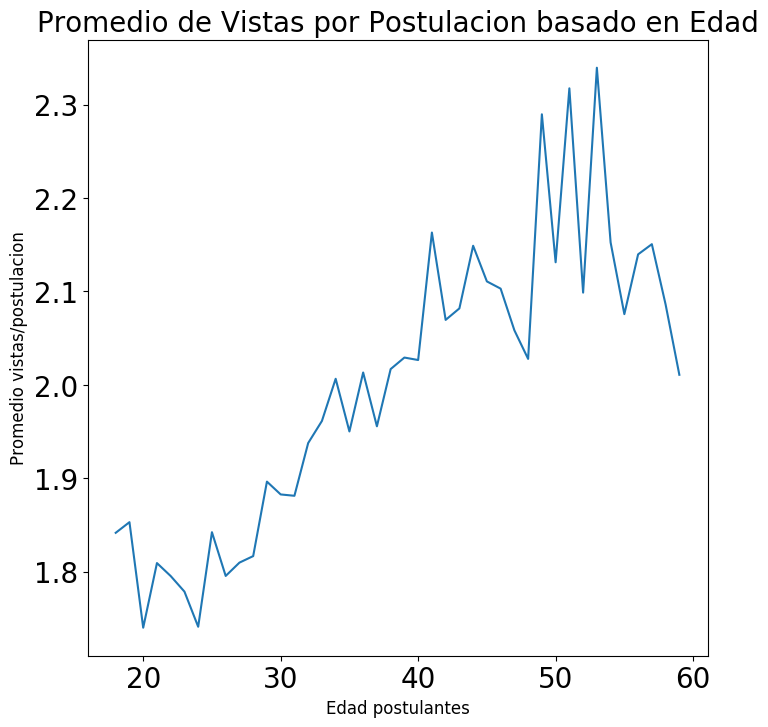

In [35]:
promedio_vistas_por_postulacion_por_edad_plot = vistas_por_postulacion_promedio_edad.plot(
                                                 kind = 'line',
                                                 x = 'Edad_postulante',
                                                 y = 'promedio vistas/postulacion',figsize=(8,8),
                                                 fontsize = 20,legend=False)

promedio_vistas_por_postulacion_por_edad_plot.set_title('Promedio de Vistas por Postulacion basado en Edad',
                                                        fontsize = 20)

promedio_vistas_por_postulacion_por_edad_plot.set_xlabel('Edad postulantes',fontsize = 12)

promedio_vistas_por_postulacion_por_edad_plot.set_ylabel('Promedio vistas/postulacion', fontsize = 12)


Los datos nos permiten graficar el promedio de vistas por postulacion promedio para las edades desde 18 a 60, ya que para las demas edades, no consideramos contar con datos suficientes.
Se puede observar que a medida que la edad de los postulantes aumenta, tambien puede apreciarse un aumento en el promedio de las vistas por postulacion. Una posible interpretacion de este grafico es que a medida de que la edad de los postulantes tienden leer o analizar mas los avisos a los que se postulan.
Cabe destacar que aqui no analizamos si la vistas a los avisos se realizaron antes o despues de postularse.
La interpretacion anterior puede apreciarse de mejor manera si agrupamos las edades de los postulantes en categorias, de 5 en 5 años.


In [36]:
vistas_por_postulacion_edad['Edad_postulante'] = pd.cut(vistas_por_postulacion_edad['Edad_postulante'],[18,20,25,30,35,40,45,50,55,60,65,70,75,80])
vistas_por_postulacion_promedio_edad = vistas_por_postulacion_edad.groupby('Edad_postulante')\
                                        .agg({'vistas/postulacion':['mean','count']})

vistas_por_postulacion_promedio_edad.columns=['promedio vistas/postulacion', 'cantidad de postulantes']
vistas_por_postulacion_promedio_edad = vistas_por_postulacion_promedio_edad.loc[vistas_por_postulacion_promedio_edad['cantidad de postulantes']>500]
vistas_por_postulacion_promedio_edad.reset_index(inplace = True)
vistas_por_postulacion_promedio_edad.head()

,Edad_postulante,promedio vistas/postulacion,cantidad de postulantes
0,"(18, 20]",1.789370,4511
1,"(20, 25]",1.793145,19264
2,"(25, 30]",1.836427,19171
3,"(30, 35]",1.942561,12404
4,"(35, 40]",2.006510,7979


In [37]:
vistas_por_postulacion_promedio_edad

,Edad_postulante,promedio vistas/postulacion,cantidad de postulantes
0,"(18, 20]",1.789370,4511
1,"(20, 25]",1.793145,19264
2,"(25, 30]",1.836427,19171
3,"(30, 35]",1.942561,12404
4,"(35, 40]",2.006510,7979
5,"(40, 45]",2.115655,4419
6,"(45, 50]",2.113716,2658
7,"(50, 55]",2.207675,1452
8,"(55, 60]",2.129035,740


(0, 3.5)

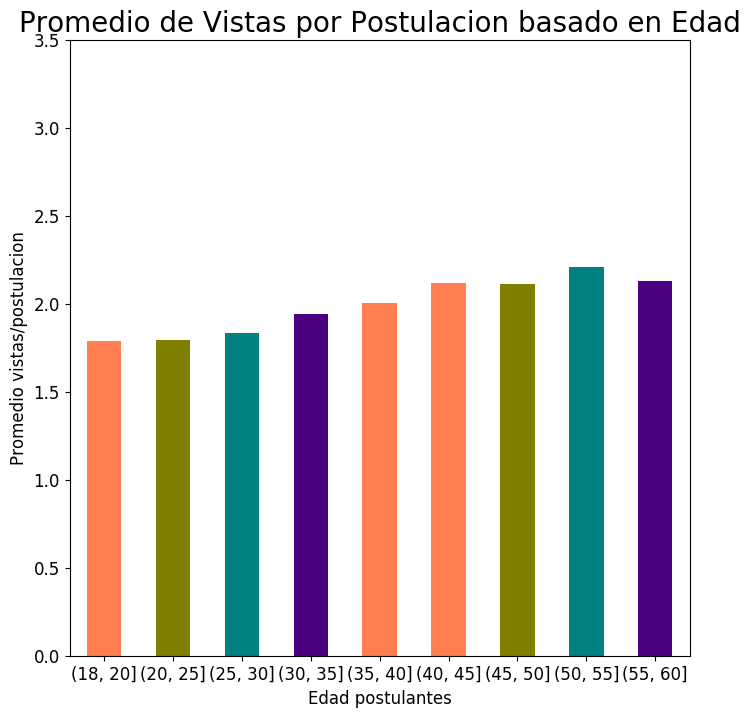

In [39]:
promedio_vistas_por_postulacion_por_edad_plot = vistas_por_postulacion_promedio_edad.plot(
                                                 kind = 'bar',
                                                 x = 'Edad_postulante',
                                                 y = 'promedio vistas/postulacion',
                                                 color = ['coral','olive','teal','indigo'],legend=False,figsize=(8,8),
                                                 rot=0,fontsize = 12)

promedio_vistas_por_postulacion_por_edad_plot.set_title('Promedio de Vistas por Postulacion basado en Edad',
                                                        fontsize = 20)

promedio_vistas_por_postulacion_por_edad_plot.set_xlabel('Edad postulantes',fontsize = 12)

promedio_vistas_por_postulacion_por_edad_plot.set_ylabel('Promedio vistas/postulacion', fontsize = 12)
plt.ylim([0,3.5])

Aqui al agrupar las edades en categorias puede apreciarse el aumento del promedio de vistas por postulacion de una 
forma mas sostenida, sin los picos que de subida o caida que se aprecian en un grafico de linea.

## Relacion vistas/postulacion por sexo


In [40]:
#Obtenemos un dataframe con el promedio de vistas/postulacion de cada postulante y su sexo

vistas_por_postulacion_sexo = pd.merge(genero_edad,vistas_por_postulacion,on='idpostulante',how = 'inner')[['Sexo','vistas/postulacion']]
vistas_por_postulacion_sexo.rename(columns={'Edad':'Edad_postulante'}, inplace = True)
vistas_por_postulacion_sexo['Sexo'].value_counts()

FEM           39434
MASC          34154
NO_DECLARA      181
Name: Sexo, dtype: int64

In [42]:
#Descartamos los postulantes que no declaran sexo, y calculamos el promedio de vistas/postulacion correspondiente a cada sexo

vistas_por_postulacion_sexo = vistas_por_postulacion_sexo.loc[vistas_por_postulacion_sexo['Sexo']!='NO_DECLARA']
vistas_promedio_por_postulacion_sexo = vistas_por_postulacion_sexo.groupby('Sexo')\
                                        .agg({'vistas/postulacion':'mean'})
vistas_promedio_por_postulacion_sexo.reset_index(inplace = True)
vistas_promedio_por_postulacion_sexo.replace({'FEM':'Femenino','MASC':'Masculino'},inplace=True)
vistas_promedio_por_postulacion_sexo

,Sexo,vistas/postulacion
0,Femenino,1.963215
1,Masculino,1.817229


Text(0,0.5,'Promedio Vistas/Postulacion')

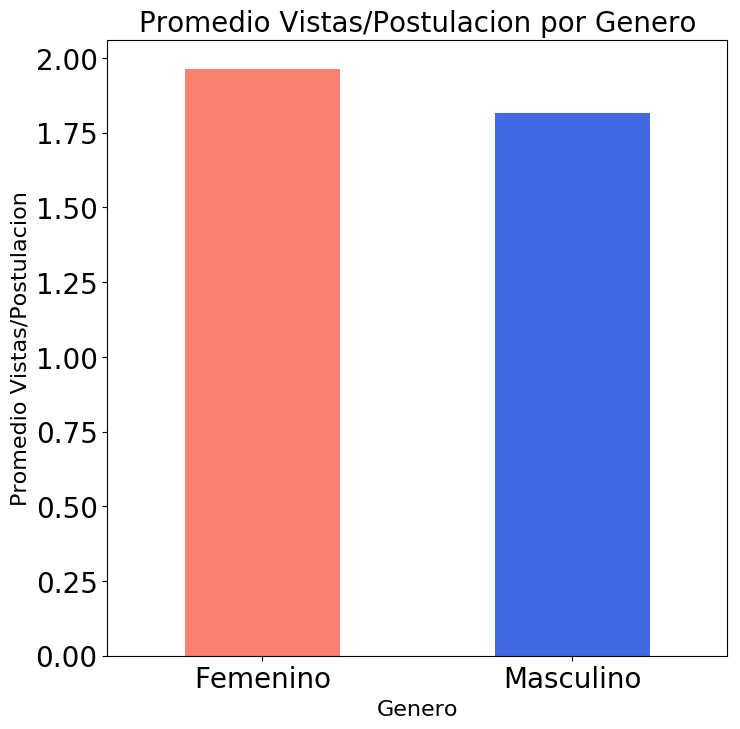

In [45]:
vistas_promedio_por_post_sexo_plot = vistas_promedio_por_postulacion_sexo.plot(
                                                 kind = 'bar',
                                                 x = 'Sexo',
                                                 y = 'vistas/postulacion',
                                                 color = ['salmon','royalblue'],
                                                 fontsize = 20,legend=False,rot=0,
                                                 figsize = (8,8))

vistas_promedio_por_post_sexo_plot.set_title('Promedio Vistas/Postulacion por Genero',fontsize = 20)
vistas_promedio_por_post_sexo_plot.set_xlabel('Genero',fontsize = 16)
vistas_promedio_por_post_sexo_plot.set_ylabel('Promedio Vistas/Postulacion', fontsize = 16)

Se puede observar un promedio levemente mayor por parte del sexo femenino en el promedio de numero visitas a los avisos a los que se postularon. Esta leve superioridad en el numero de visitas por cada postulacion podria interpretarse como una tendencia de las postulantes de sexo femenino a leer, revisar, o analizar los avisos en mayor medida que los postulantes de sexo masculino.

## Visitas antes/despues de postulacion

Aqui analizamos la cantidad de visitas que los usuarios realizan a los avisos a los que se postulan. Esto quiere decir que en este analisis no tenemos en cuenta las visitas a avisos a los que no realizaron postulaciones.

In [46]:
#Agrego una columna nueva que indica si la visita realiza
vistas_postulaciones_merged['visita_anterior'] = vistas_postulaciones_merged['Fecha_Vista'] < vistas_postulaciones_merged['Fecha_Postulacion']
vistas_antes_despues = vistas_postulaciones_merged['visita_anterior'].value_counts()
vistas_antes_despues


False    525913
True       3641
Name: visita_anterior, dtype: int64

Text(0,0.5,'Cantidad')

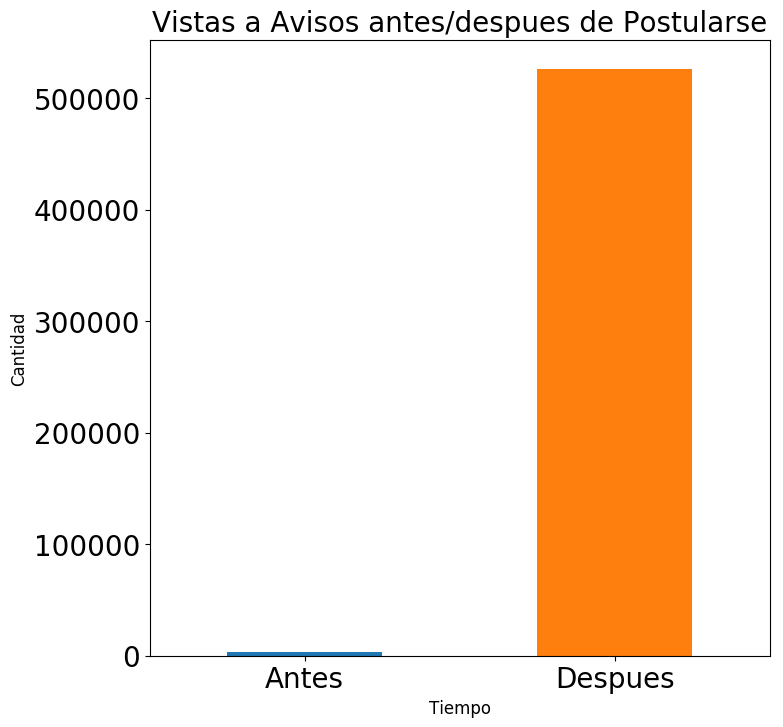

In [48]:
vistas_antes_despues.sort_values(ascending = True, inplace = True)
vistas_antes_despues.index = ['Antes','Despues']
vistas_antes_despues_plot = vistas_antes_despues.plot.bar(figsize=(8,8),rot=0, fontsize = 20)
vistas_antes_despues_plot.set_title("Vistas a Avisos antes/despues de Postularse",fontsize=20)
vistas_antes_despues_plot.set_xlabel("Tiempo",fontsize=12)
vistas_antes_despues_plot.set_ylabel("Cantidad",fontsize=12)



Aqui podemos observar claramente que los postulantes tienden a visitar los avisos mucho mas una vez que 
ya se han postulado. Esto podria significar que los postulantes no tienden a analizar demasiado los avisos
laborales antes de postularse. Una vez que ya se postularon, sienten el deseo o necesidad de visitar los avisos nuevamente, para corroborar alguna informacion o para analizar nuevamente el aviso.
Es sorprendente la poca cantidad de vistas que se realizan a los avisos antes de postularse en comparacion con las vistas posteriores.